In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [4]:
# 1. Read the data
data = pd.read_csv("iris.csv")

In [5]:
# 2. Display the first and last 5 rows
print("First 5 rows:")
print(data.head())
print("\nLast 5 rows:")
print(data.tail())

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Last 5 rows:
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [6]:
# 3. Display the number of rows and columns
print("\nNumber of rows and columns:")
print(data.shape)


Number of rows and columns:
(150, 5)


In [7]:
# 4. Display the number of categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns
print("\nNumber of categorical columns:", len(categorical_cols))
print("Number of numerical columns:", len(numerical_cols))


Number of categorical columns: 1
Number of numerical columns: 4


In [8]:
# 5. For numerical columns, display the min, max, and mode
print("\nMin, Max, and Mode of numerical columns:")
for col in numerical_cols:
    print(f"{col}: Min={data[col].min()}, Max={data[col].max()}, Mode={data[col].mode()[0]}")


Min, Max, and Mode of numerical columns:
sepal_length: Min=4.3, Max=7.9, Mode=5.0
sepal_width: Min=2.0, Max=4.4, Mode=3.0
petal_length: Min=1.0, Max=6.9, Mode=1.4
petal_width: Min=0.1, Max=2.5, Mode=0.2


In [9]:
# 6. Display the columns with null values
print("\nColumns with null values:")
print(data.isnull().sum()[data.isnull().sum() > 0])


Columns with null values:
Series([], dtype: int64)



Five-number summary:
     sepal_length  sepal_width  petal_length  petal_width
min           4.3          2.0          1.00          0.1
25%           5.1          2.8          1.60          0.3
50%           5.8          3.0          4.35          1.3
75%           6.4          3.3          5.10          1.8
max           7.9          4.4          6.90          2.5


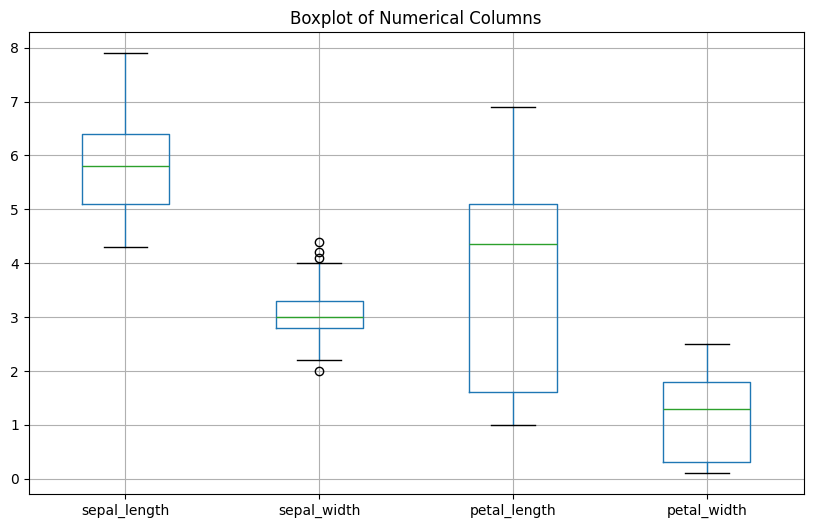

In [10]:
# 7. Calculate the 5-number summary and correlate with box plot
print("\nFive-number summary:")
five_num_summary = data[numerical_cols].describe().loc[["min", "25%", "50%", "75%", "max"]]
print(five_num_summary)

data[numerical_cols].boxplot(figsize=(10, 6))
plt.title("Boxplot of Numerical Columns")
plt.show()

In [11]:
# 8. Display the outlier values using Z-score
print("\nOutliers based on Z-score:")
z_scores = np.abs(zscore(data[numerical_cols]))
outliers = np.where(z_scores > 3)
print(f"Outliers (row, column): {list(zip(outliers[0], outliers[1]))}")


Outliers based on Z-score:
Outliers (row, column): [(np.int64(15), np.int64(1))]


In [12]:
# 9. Display features with high positive correlation, high negative correlation, and no correlation
correlation_matrix = data[numerical_cols].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

high_positive_corr = correlation_matrix[correlation_matrix > 0.7]
high_negative_corr = correlation_matrix[correlation_matrix < -0.7]
no_corr = correlation_matrix[(correlation_matrix > -0.1) & (correlation_matrix < 0.1)]
print("\nHigh positive correlation:")
print(high_positive_corr)
print("\nHigh negative correlation:")
print(high_negative_corr)
print("\nNo correlation:")
print(no_corr)


Correlation matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

High positive correlation:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000          NaN      0.871754     0.817941
sepal_width            NaN          1.0           NaN          NaN
petal_length      0.871754          NaN      1.000000     0.962865
petal_width       0.817941          NaN      0.962865     1.000000

High negative correlation:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length           NaN          NaN           NaN          NaN
sepal_width            NaN          NaN           NaN          NaN
petal_length           NaN          NaN           Na


Skewness analysis:


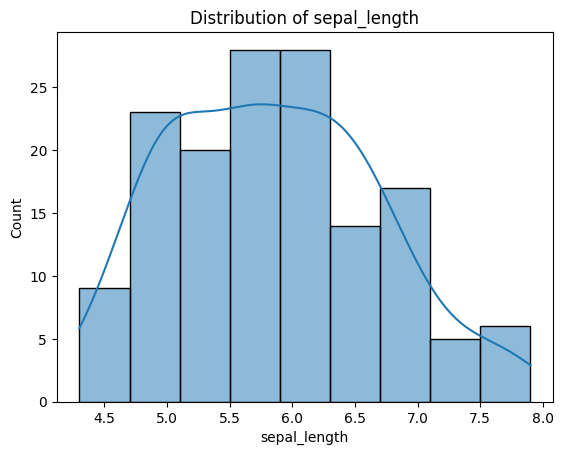

sepal_length is right-skewed (Skewness=0.3149109566369728)


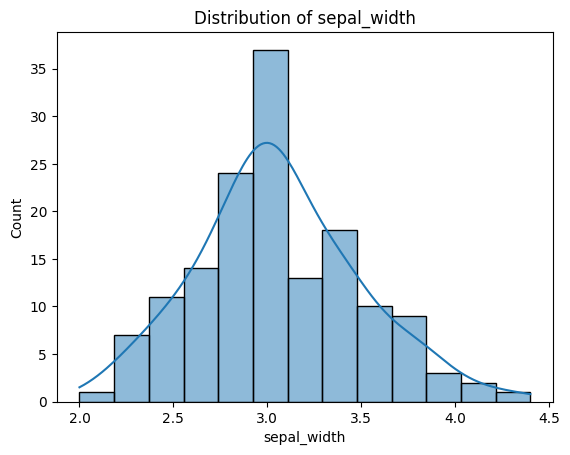

sepal_width is right-skewed (Skewness=0.31896566471359966)


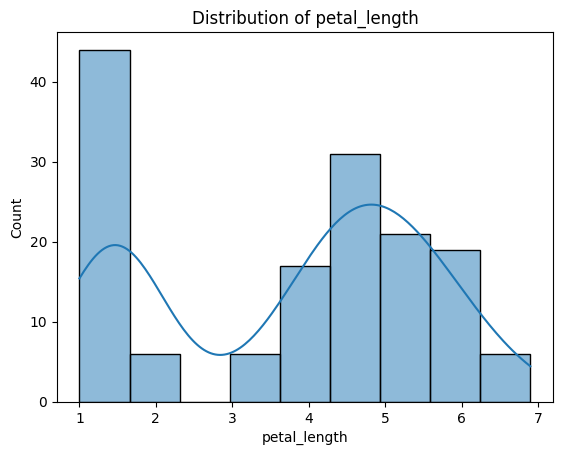

petal_length is left-skewed (Skewness=-0.27488417975101276)


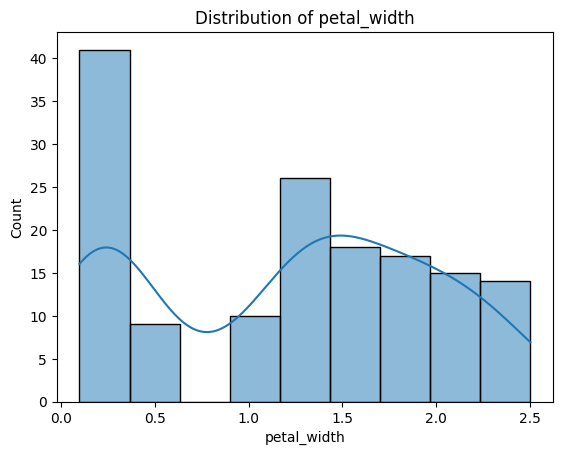

petal_width is left-skewed (Skewness=-0.10296674764898116)


In [13]:
# 10. Analyze skewness of the features using distribution plot
print("\nSkewness analysis:")
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    skewness = data[col].skew()
    if skewness > 0:
        print(f"{col} is right-skewed (Skewness={skewness})")
    elif skewness < 0:
        print(f"{col} is left-skewed (Skewness={skewness})")
    else:
        print(f"{col} has no skew (Skewness={skewness})")

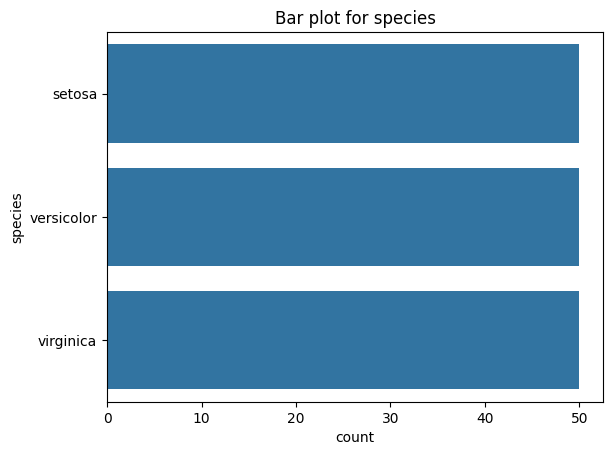

In [14]:

# 11. Univariate analysis for categorical variables using bar plot
for col in categorical_cols:
    sns.countplot(data[col])
    plt.title(f"Bar plot for {col}")
    plt.show()


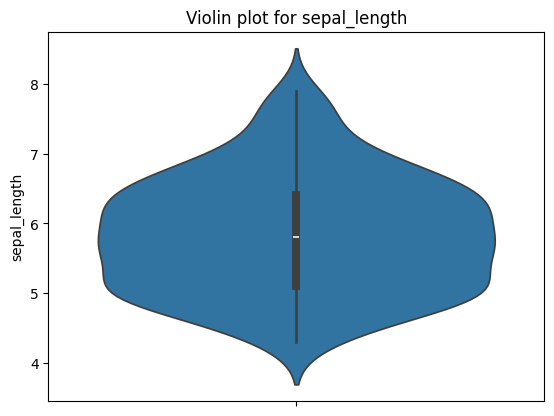

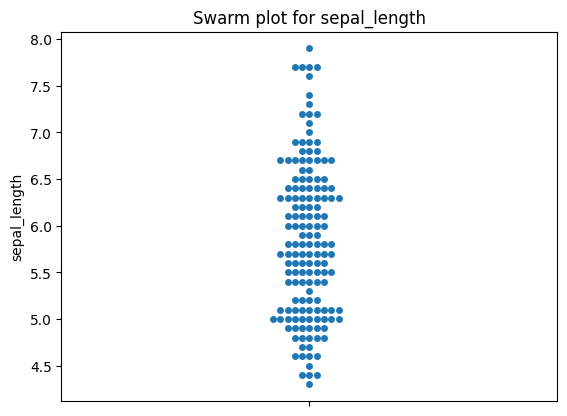

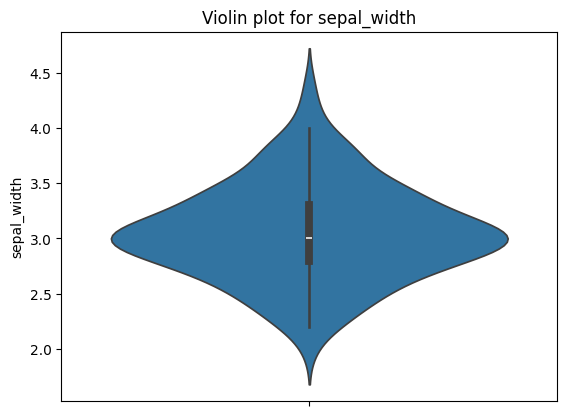

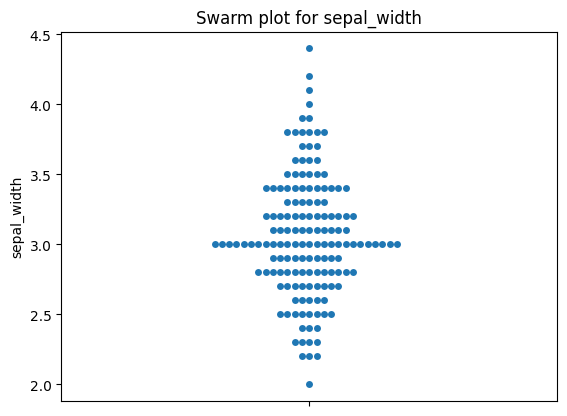

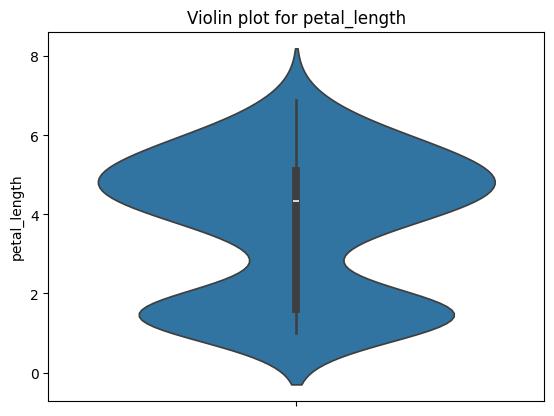

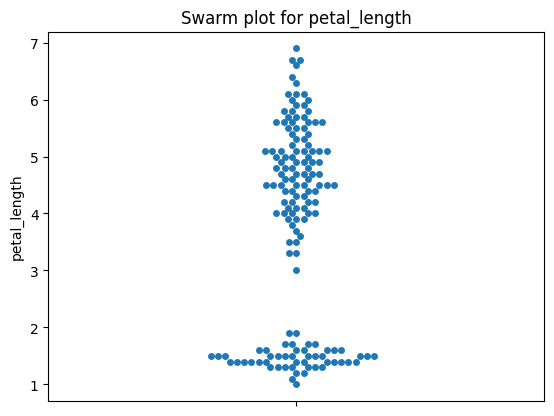

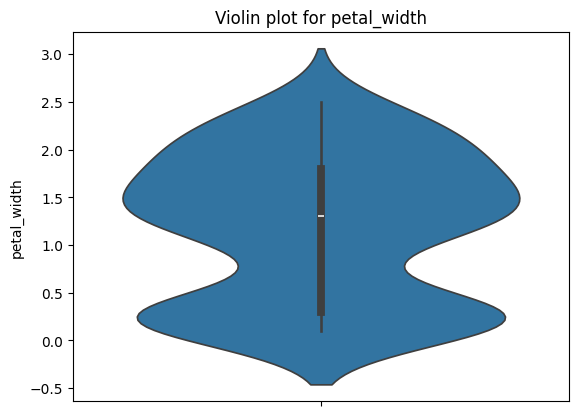

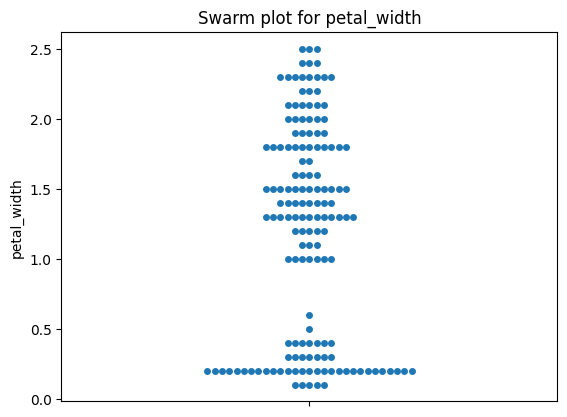

In [15]:
# 12. Univariate analysis for continuous variables using swarm plot and violin plot
for col in numerical_cols:
    sns.violinplot(y=data[col])
    plt.title(f"Violin plot for {col}")
    plt.show()

    sns.swarmplot(y=data[col])
    plt.title(f"Swarm plot for {col}")
    plt.show()

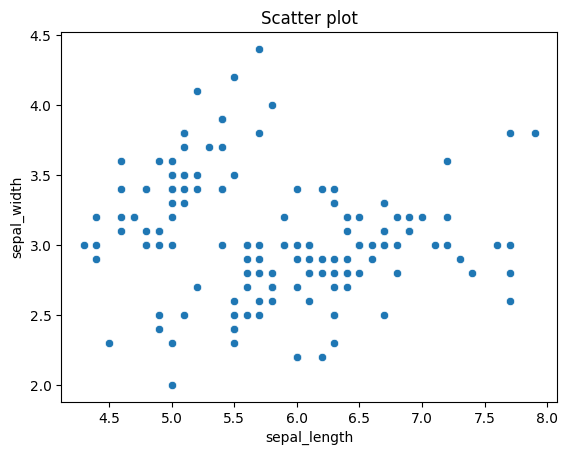

In [16]:
# 13. Scatter plot to show relationship between two continuous variables
sns.scatterplot(x=data[numerical_cols[0]], y=data[numerical_cols[1]])
plt.title("Scatter plot")
plt.show()

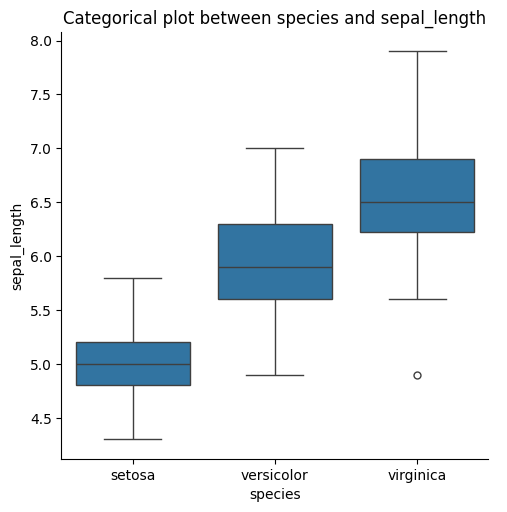

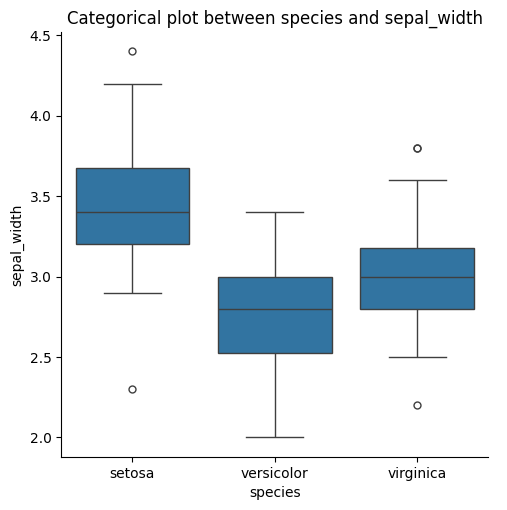

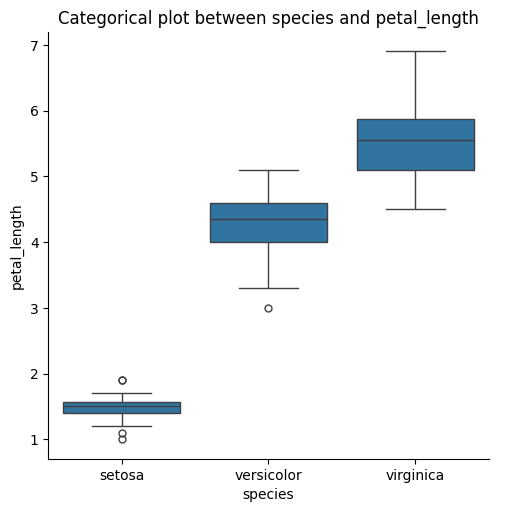

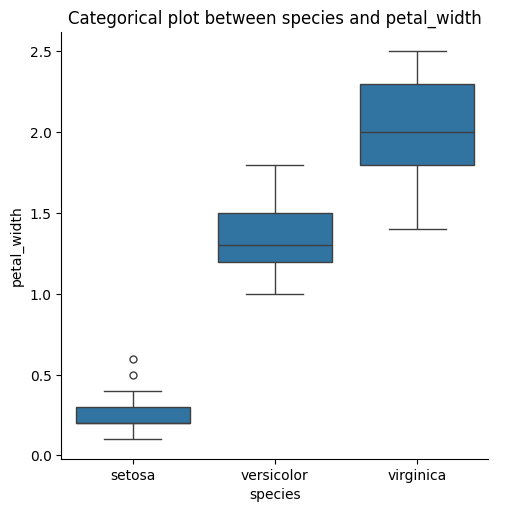

In [17]:

# 14. Bivariate analysis between continuous variable and categorical variable using categorical plot
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        sns.catplot(x=cat_col, y=num_col, kind="box", data=data)
        plt.title(f"Categorical plot between {cat_col} and {num_col}")
        plt.show()

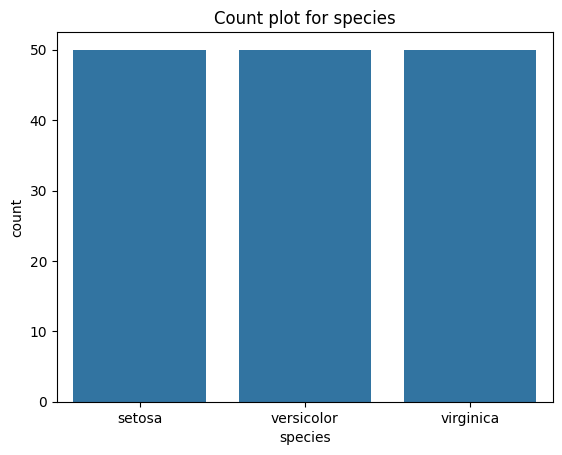

In [18]:
# 15. Display the counts of observations for categorical variable using count plot
for col in categorical_cols:
    sns.countplot(x=data[col])
    plt.title(f"Count plot for {col}")
    plt.show()

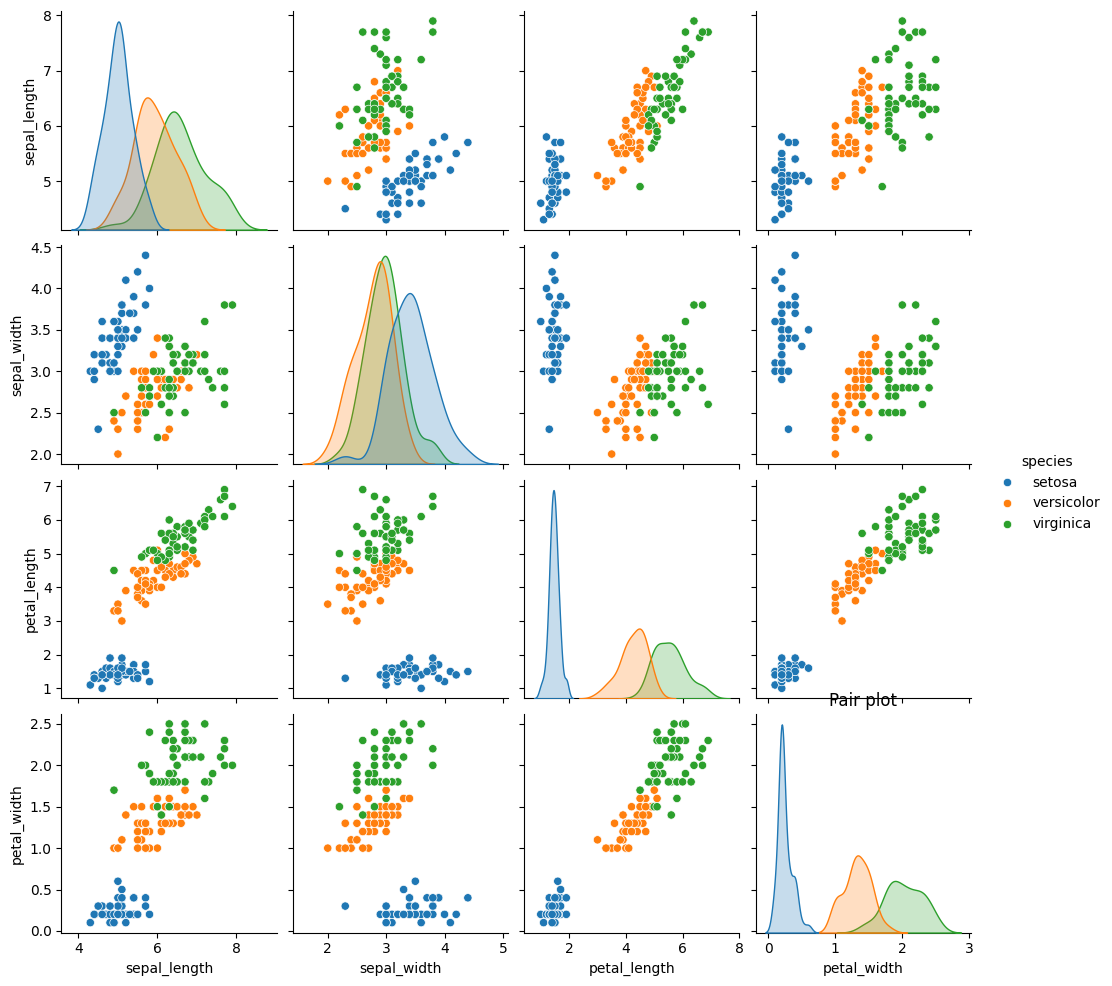

In [19]:
# 16. Multivariate analysis using pair plot
sns.pairplot(data, hue=categorical_cols[0])
plt.title("Pair plot")
plt.show()